In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/higut/Desktop/Analitica Computacional/Taller3/Taller3/real_estate_valuation_data_set.csv", index_col=0)


In [4]:
data.shape

(414, 7)

In [5]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Estadísticas descriptivas

In [6]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Incluir seaborn para Visualización

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

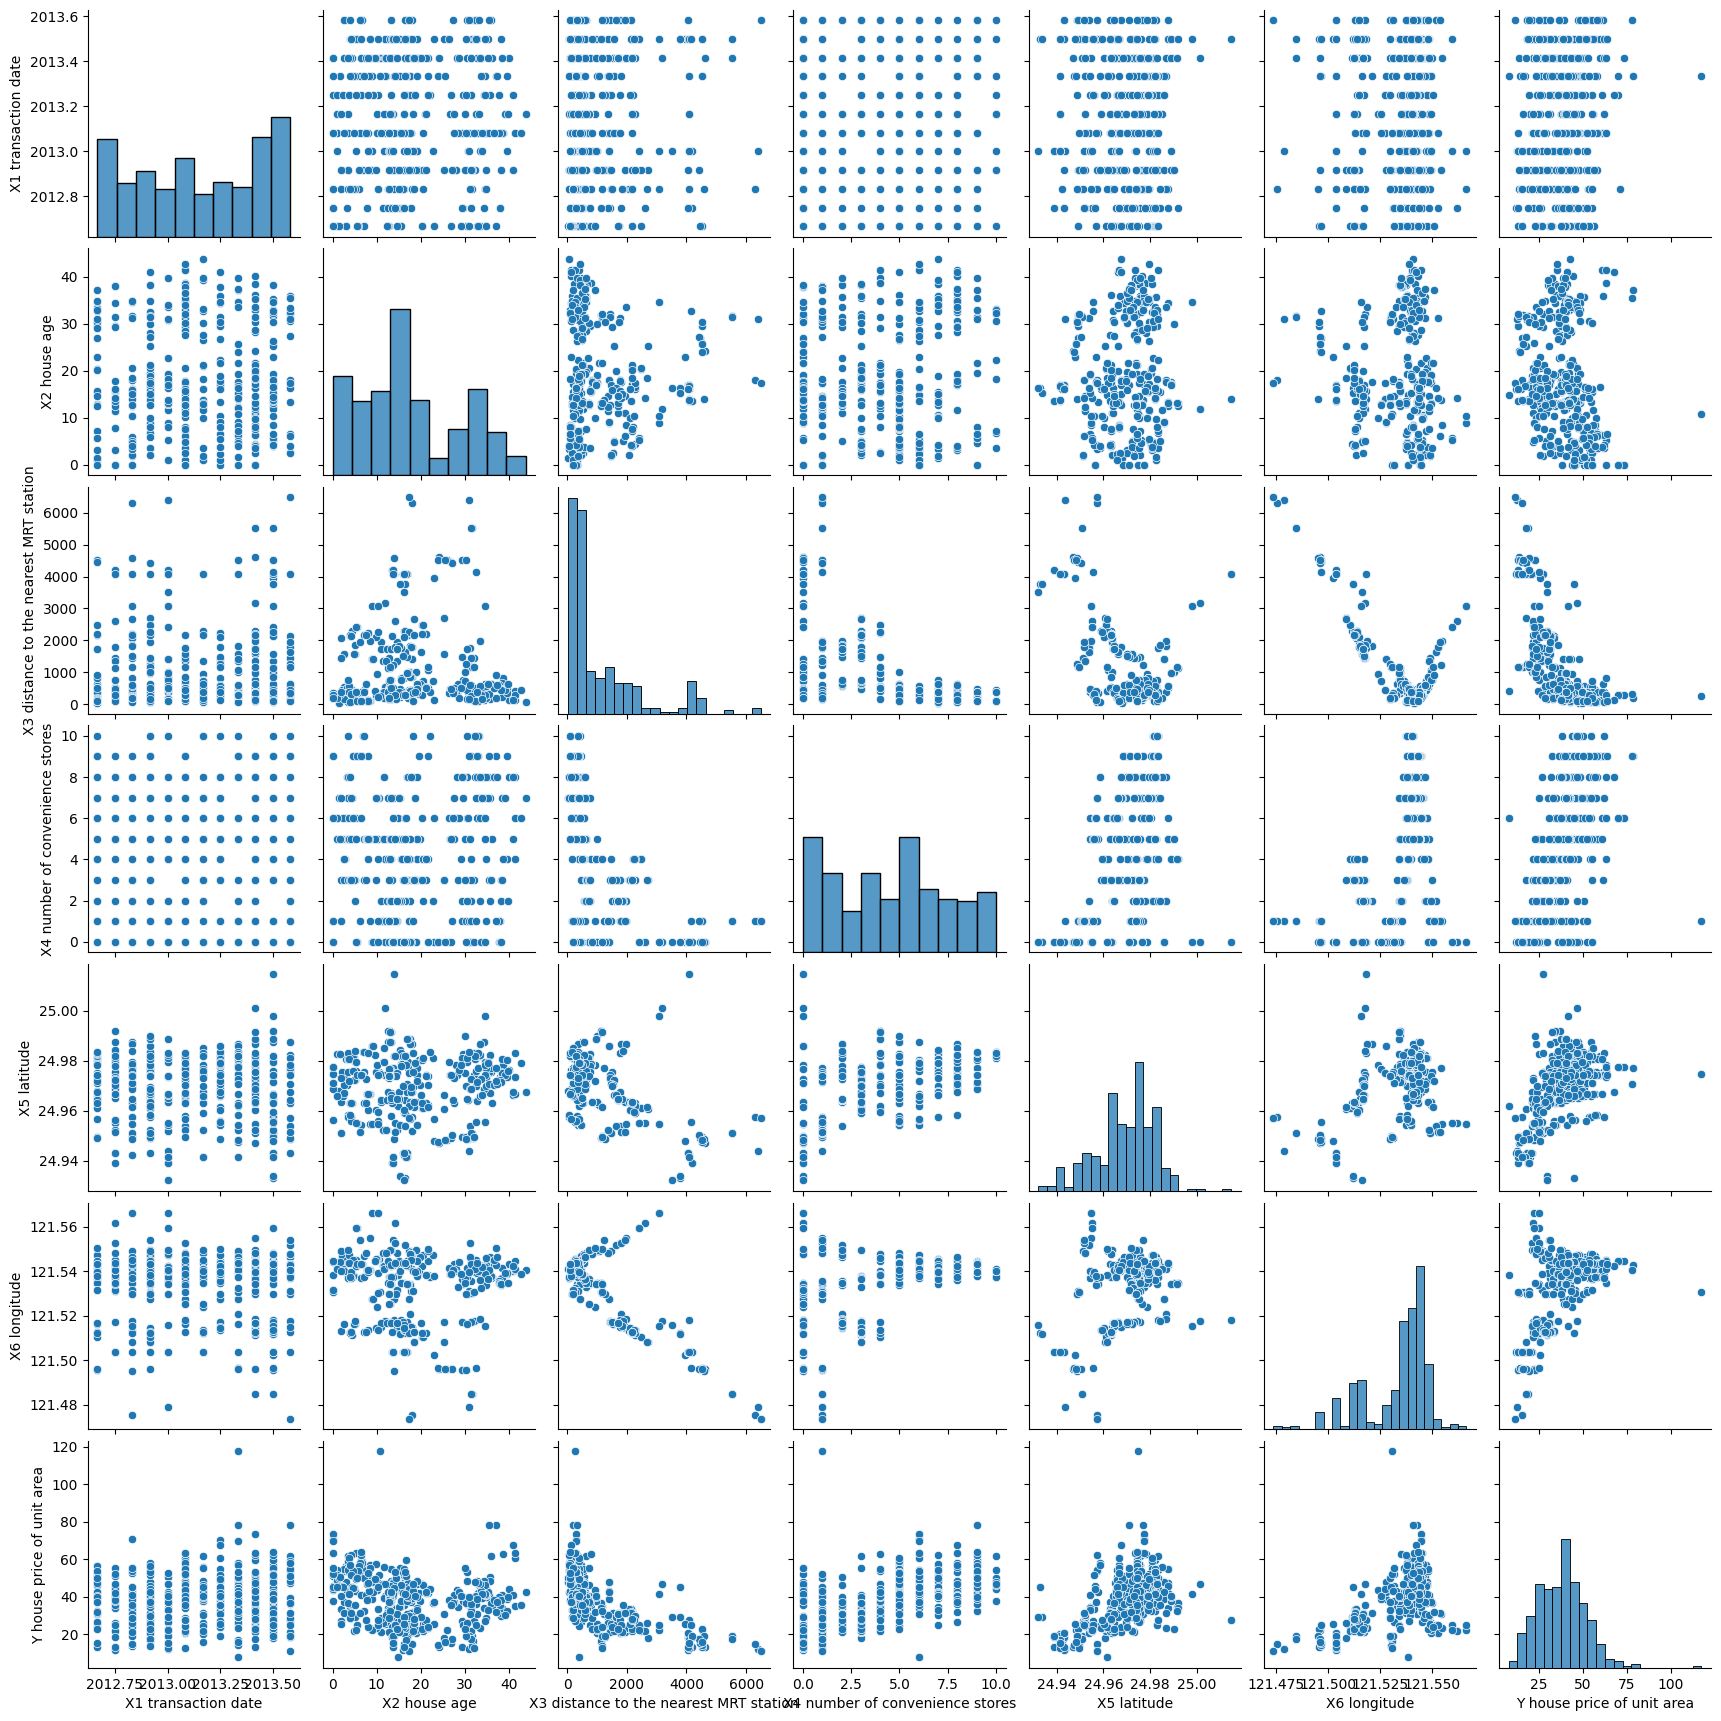

In [9]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

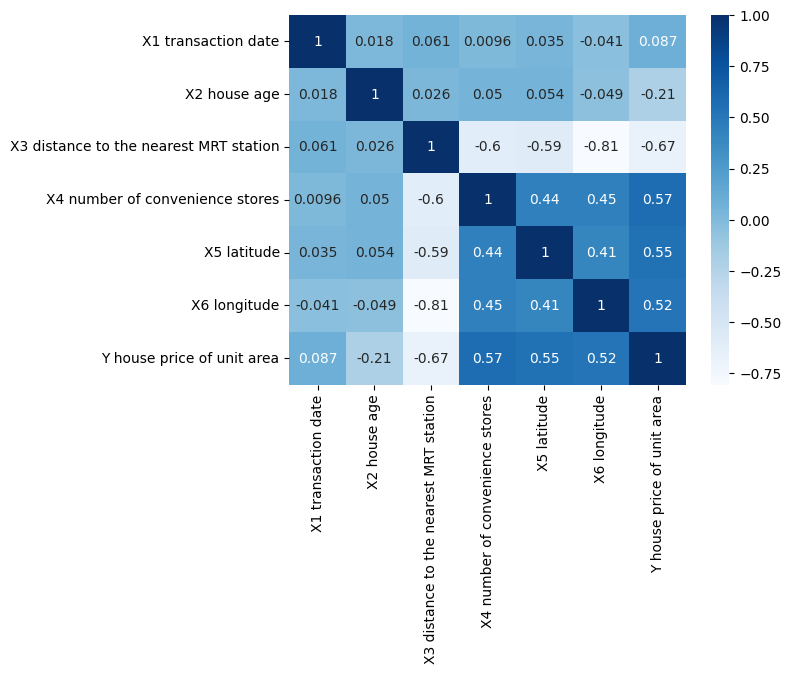

In [10]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

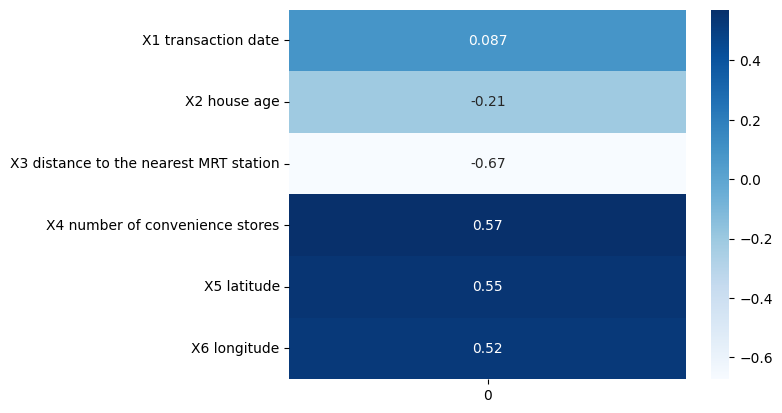

In [11]:
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

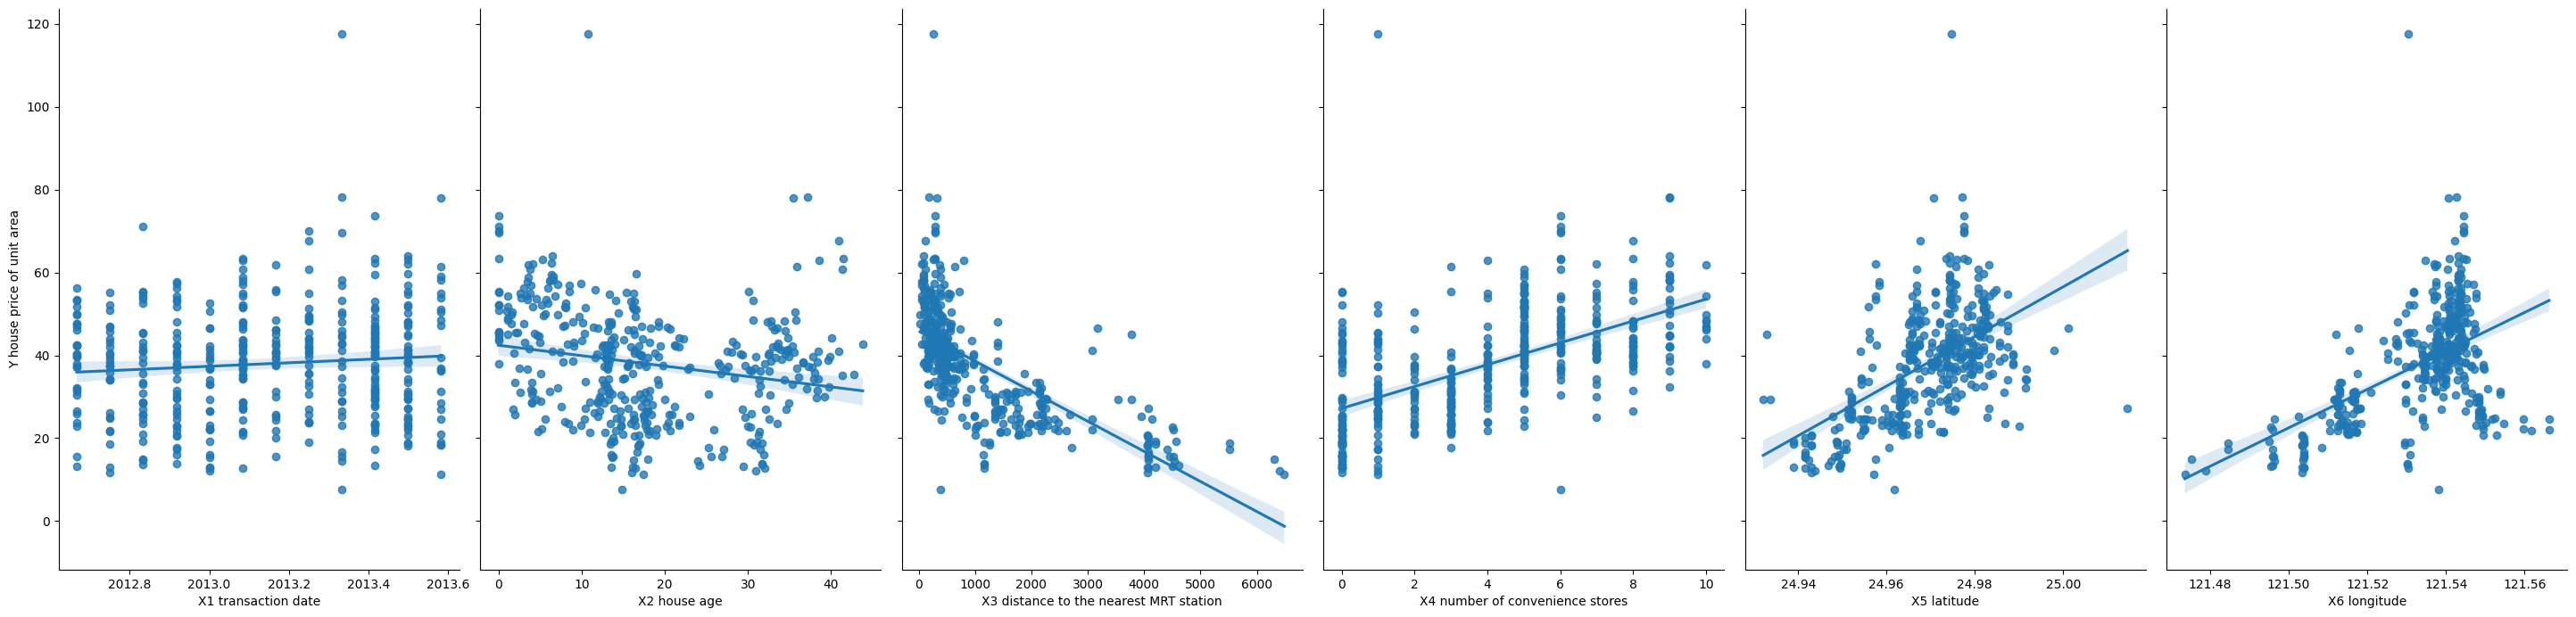

In [12]:
sns.pairplot(data, x_vars=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'], y_vars= 'Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper}$

In [13]:
# nombres de características
features = ['TV', 'Radio', 'Newspaper']

# dataframe de características
X = data[features]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
X.shape

(200, 3)

In [15]:
# variable de respuesta
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [16]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [17]:

import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [19]:
print(X.head())
print(X_train.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
        TV  Radio  Newspaper
99   289.7   42.3       51.2
124  123.1   34.6       12.4
120   19.4   16.0       22.3
54   182.6   46.2       58.7
34   265.6   20.0        0.3


In [20]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [21]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [22]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [23]:
print(X.head())
print(X_train.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


In [24]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [25]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

2.907947020816433
[0.0468431  0.17854434 0.00258619]


In [28]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('TV', np.float64(0.04684310317699042)),
 ('Radio', np.float64(0.17854434380887602)),
 ('Newspaper', np.float64(0.0025861860939890013))]

### Predicciones usando los datos de prueba

In [29]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [30]:
from sklearn import metrics

In [31]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [32]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  1.0402154012924718
MSE:  1.9918855518287906
RMSE:  1.4113417558581587


### Selección de variables - Modelo con otro subconjunto de variables

In [33]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  1.0477590411212603
MSE:  1.9262760418667428
RMSE:  1.3879034699382888


### Validación cruzada

In [34]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[3.07164335 2.41053755 1.5737634  5.20917023 2.79308892]


In [35]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.75261044 1.55259059 1.25449727 2.28236067 1.6712537 ]


In [36]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

1.7026625340333177


## Ahora usando statsmodels

In [37]:
import statsmodels.api as sm

features = ['TV', 'Radio', 'Newspaper']

X = data[features]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     395.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           7.84e-70
Time:                        13:53:07   Log-Likelihood:                -297.38
No. Observations:                 150   AIC:                             602.8
Df Residuals:                     146   BIC:                             614.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8770      0.368      7.822      0.0

### El segundo modelo, sin Newspaper

In [38]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     595.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.15e-71
Time:                        13:53:17   Log-Likelihood:                -297.48
No. Observations:                 150   AIC:                             601.0
Df Residuals:                     147   BIC:                             610.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9272      0.350      8.360      0.0

### Determinar la influencia de las observaciones

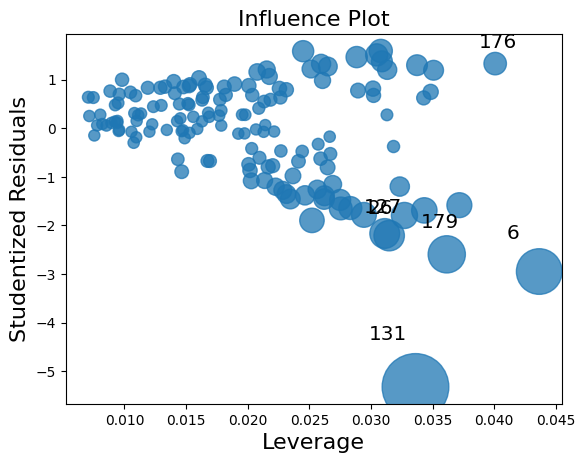

In [39]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [40]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.02666666666666667
Index([79, 6, 76, 3, 131, 127, 170, 132, 179, 26], dtype='int64') 
 [0.03046438 0.12569998 0.03345016 0.03192633 0.27702203 0.04896067
 0.03165896 0.03577477 0.0810171  0.05155791]


In [41]:
X_train[out_d]

,const,TV,Radio
79,1.0,5.4,29.9
6,1.0,8.7,48.9
76,1.0,16.9,43.7
3,1.0,17.2,45.9
131,1.0,0.7,39.6
127,1.0,7.8,38.9
170,1.0,284.3,10.6
132,1.0,265.2,2.9
179,1.0,276.7,2.3
26,1.0,262.9,3.5


In [42]:
y_train[out_d]

79      5.3
6       7.2
76      8.7
3       9.3
131     1.6
127     6.6
170    15.0
132    12.7
179    11.8
26     12.0
Name: Sales, dtype: float64